<a href="https://colab.research.google.com/github/Evans-Junior/ChestDiseasePrediction_Group17/blob/main/TuberculosisModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install  keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.12.0 which is incompatible.


**Data preprocessing**

**Referencing**

In [3]:
# Tuberculosis (TB) Chest X-ray Database
# https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset/data

# We had 3500 normal people X-ray and 700 peoples' tuberculosis

**To balance the weights for the dataset we took 700 random x-rays from the 3500**

In [4]:
import os
import random
import shutil

# Define the path to the directory containing the original images
original_normal_dir = '/content/drive/My Drive/AI/Dataset/TuberculosisData/Normal'

# Define the path to the directory where you want to save the randomized and selected images
normal_dir = '/content/drive/MyDrive/AI/Dataset/normal'

# Create the new directory if it doesn't exist
os.makedirs(normal_dir, exist_ok=True)

# Collect paths to all images in the original directory
all_paths = [os.path.join(original_normal_dir, filename) for filename in os.listdir(original_normal_dir) if filename.endswith(('.jpg', '.png'))]

# Shuffle the paths
random.shuffle(all_paths)

# Select the first 700 paths
selected_paths = all_paths[:700]

# Copy the selected images to the new directory
for src_path in selected_paths:
    filename = os.path.basename(src_path)
    dst_path = os.path.join(normal_dir, filename)
    shutil.copy(src_path, dst_path)



***Data visualization***

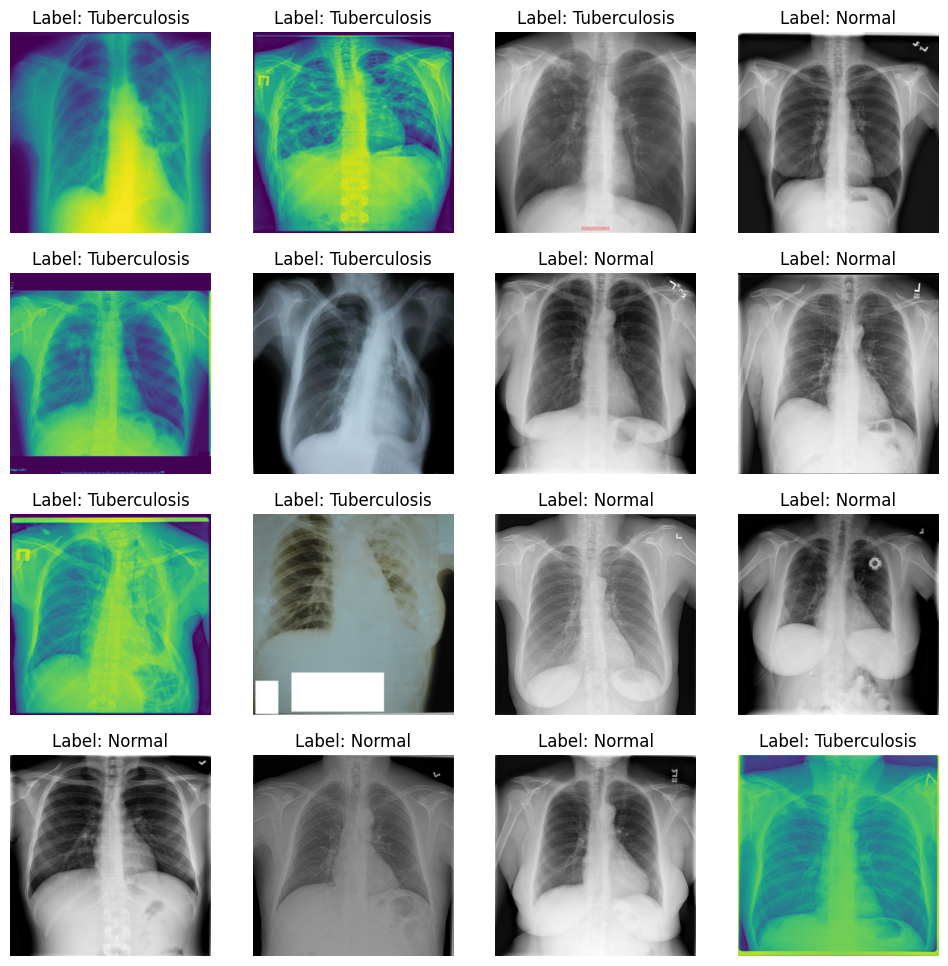

In [5]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the paths to the directories containing images
tuberculosis_dir = '/content/drive/MyDrive/AI/Dataset/Tuberculosis'
normal_dir = '/content/drive/MyDrive/AI/Dataset/normal'

# Collect paths to all images in the directories along with labels
tuberculosis_paths = [(path, 'Tuberculosis') for path in os.listdir(tuberculosis_dir) if path.endswith(('.jpg', '.png'))]
normal_paths = [(path, 'Normal') for path in os.listdir(normal_dir) if path.endswith(('.jpg', '.png'))]

# Combine and shuffle the paths
all_paths = tuberculosis_paths + normal_paths
random.shuffle(all_paths)

# Display 16 shuffled images with labels
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    img_path, label = all_paths[i]
    img = mpimg.imread(os.path.join(tuberculosis_dir if label == 'Tuberculosis' else normal_dir, img_path))
    plt.imshow(img)
    plt.title(f'Label: {label}')
    plt.axis('off')

plt.show()


In [6]:
import keras
import tensorflow as tf
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Function to load and preprocess images from a directory
def load_images_from_directory(directory):
    images = []
    labels = []
    label = os.path.basename(directory)
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
            filepath = os.path.join(directory, filename)
            img = tf.keras.preprocessing.image.load_img(filepath, target_size=(224, 224))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            img_array /= 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load images and labels from directories
tuberculosis_images, tuberculosis_labels = load_images_from_directory('/content/drive/MyDrive/AI/Dataset/Tuberculosis')
normal_images, normal_labels = load_images_from_directory('/content/drive/MyDrive/AI/Dataset/normal')

# Combine the data
all_images = np.concatenate([tuberculosis_images, normal_images])
all_labels = np.concatenate([tuberculosis_labels, normal_labels])

**Organizing data for training into**

1.   X_train
2.   X_val
3.   X_test



In [7]:
# Encode labels (0 for Tuberculosis, 1 for Normal)
label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)

# Split the data into training and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(all_images, all_labels_encoded, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


In [10]:
from keras.layers import Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
from keras.optimizers import Adam

# Constants
image_size = 224  # Adjust as needed
batch_size = 32
filters = 32
kernel_size = (3, 3)
dropout = 0.5

In [ ]:

# Build the model using functional API
inputs = Input(shape=(image_size, image_size, 3))  # Assuming RGB images
y = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')(y)
y = Flatten()(y)
y = Dropout(dropout)(y)
outputs = Dense(1, activation='sigmoid')(y)  # Binary classification, use 'sigmoid' activation

# Build the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=batch_size)

# Evaluate the model
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Epoch 1/20
35/35 [==============================] - 112s 3s/step - loss: 0.4668 - accuracy: 0.7482 - val_loss: 0.4038 - val_accuracy: 0.8500
Epoch 2/20
35/35 [==============================] - 92s 3s/step - loss: 0.3011 - accuracy: 0.8625 - val_loss: 0.2391 - val_accuracy: 0.9000
Epoch 3/20
35/35 [==============================] - 83s 2s/step - loss: 0.1778 - accuracy: 0.9312 - val_loss: 0.1952 - val_accuracy: 0.9429
Epoch 4/20
35/35 [==============================] - 82s 2s/step - loss: 0.1504 - accuracy: 0.9393 - val_loss: 0.1887 - val_accuracy: 0.9429
Epoch 5/20
35/35 [==============================] - 85s 2s/step - loss: 0.1140 - accuracy: 0.9643 - val_loss: 0.2080 - val_accuracy: 0.9429
Epoch 6/20
35/35 [==============================] - 79s 2s/step - loss: 0.1038 - accuracy: 0.9598 - val_loss: 0.2084 - val_accuracy: 0.9429
Epoch 7/20
35/35 [==============================] - 85s 2s/step - loss: 0.0951 - accuracy: 0.9616 - val_loss: 0.1663 - val_accuracy: 0.9500
Epoch 8/20
35/35 [=

In [11]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
# Function to create the model using functional API
def create_model():
    inputs = Input(shape=(image_size, image_size, 3))  # Assuming RGB images
    y = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
    y = MaxPooling2D()(y)
    y = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(y)
    y = MaxPooling2D()(y)
    y = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(y)
    y = Flatten()(y)
    y = Dropout(0.5)(y)
    outputs = Dense(1, activation='sigmoid')(y)  # Binary classification, use 'sigmoid' activation

    model = Model(inputs=inputs, outputs=outputs)
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create KerasClassifier
keras_classifier = KerasClassifier(build_fn=create_model)

# Define the hyperparameter grid
param_grid = {
    'epochs': [ 20, 30],
    'batch_size': [32, 64]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(x_train, y_train, validation_data=(x_val, y_val))

# Print the best parameters
print("Best parameters: ", grid_result.best_params_)

<ipython-input-11-1adcdd18bc19>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=create_model)


Epoch 1/20
24/24 [==============================] - 30s 1s/step - loss: 0.5578 - accuracy: 0.6850 - val_loss: 0.3546 - val_accuracy: 0.8571
Epoch 2/20
24/24 [==============================] - 28s 1s/step - loss: 0.3008 - accuracy: 0.8539 - val_loss: 0.2458 - val_accuracy: 0.9143
Epoch 3/20
24/24 [==============================] - 34s 1s/step - loss: 0.2234 - accuracy: 0.9142 - val_loss: 0.6893 - val_accuracy: 0.7357
Epoch 4/20
24/24 [==============================] - 29s 1s/step - loss: 0.3303 - accuracy: 0.8566 - val_loss: 0.4654 - val_accuracy: 0.7857
Epoch 5/20
24/24 [==============================] - 29s 1s/step - loss: 0.1881 - accuracy: 0.9169 - val_loss: 0.2421 - val_accuracy: 0.9214
Epoch 6/20
24/24 [==============================] - 30s 1s/step - loss: 0.1326 - accuracy: 0.9491 - val_loss: 0.2437 - val_accuracy: 0.9143
Epoch 7/20
24/24 [==============================] - 29s 1s/step - loss: 0.1183 - accuracy: 0.9517 - val_loss: 0.2233 - val_accuracy: 0.9357
Epoch 8/20
24/24 [==

**Evaluation of current model**

In [12]:
from sklearn.metrics import roc_auc_score, accuracy_score

# Predictions on validation set
y_val_pred = grid_result.predict(x_val)
y_val_pred_proba = grid_result.predict_proba(x_val)[:, 1]

# Predictions on test set
y_test_pred = grid_result.predict(x_test)
y_test_pred_proba = grid_result.predict_proba(x_test)[:, 1]

# AUC and accuracy scores for validation set
auc_val = roc_auc_score(y_val, y_val_pred_proba)
accuracy_val = accuracy_score(y_val, y_val_pred)

# AUC and accuracy scores for test set
auc_test = roc_auc_score(y_test, y_test_pred_proba)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print the results
print("Validation AUC:", auc_val)
print("Validation Accuracy:", accuracy_val)
print("\nTest AUC:", auc_test)
print("Test Accuracy:", accuracy_test)


5/5 [==============================] - 1s 256ms/step
Validation AUC: 0.9893682273563689
Validation Accuracy: 0.9571428571428572

Test AUC: 0.985483541198119
Test Accuracy: 0.9714285714285714


**Using the best parameters for the reevaluation**

In [13]:
# Assuming grid_result is the result of your GridSearchCV
best_model = grid_result.best_estimator_

# Predictions on validation set
y_val_pred = best_model.predict(x_val)
y_val_pred_proba = best_model.predict_proba(x_val)[:, 1]

# Predictions on test set
y_test_pred = best_model.predict(x_test)
y_test_pred_proba = best_model.predict_proba(x_test)[:, 1]

# AUC and accuracy scores for validation set
auc_val = roc_auc_score(y_val, y_val_pred_proba)
accuracy_val = accuracy_score(y_val, y_val_pred)

# AUC and accuracy scores for test set
auc_test = roc_auc_score(y_test, y_test_pred_proba)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print the results
print("Validation AUC:", auc_val)
print("Validation Accuracy:", accuracy_val)
print("\nTest AUC:", auc_test)
print("Test Accuracy:", accuracy_test)


5/5 [==============================] - 3s 594ms/step
Validation AUC: 0.9893682273563689
Validation Accuracy: 0.9571428571428572

Test AUC: 0.985483541198119
Test Accuracy: 0.9714285714285714


**Classigication Report**

In [15]:
from sklearn.metrics import classification_report

# Convert the predicted probabilities to binary predictions
threshold = 0.5
y_val_pred_binary = (y_val_pred_proba > threshold).astype(int)
y_test_pred_binary = (y_test_pred_proba > threshold).astype(int)

# Classification report for validation set
classification_report_val = classification_report(y_val, y_val_pred_binary)
print("Classification Report for Validation Set:\n", classification_report_val)

# Classification report for test set
classification_report_test = classification_report(y_test, y_test_pred_binary)
print("Classification Report for Test Set:\n", classification_report_test)

Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.95      0.97      0.96        73

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        73
           1       0.98      0.96      0.97        67

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



**Saving the model**

In [14]:
best_model.model.save("tuberculosisModel.h5")